In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [13]:
df1 = pd.read_json('echonest-metrics.json')

In [15]:
df1.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [19]:
df1.shape

(13129, 9)

In [23]:
df2 = pd.read_csv('fma-rock-vs-hiphop.csv')

In [27]:
df2.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [31]:
df2.columns

Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'],
      dtype='object')

In [33]:
df2.shape

(17734, 21)

In [73]:
x = pd.DataFrame(df2['genre_top'], df2['track_id']).reset_index()

In [75]:
x

,track_id,genre_top
0,135,Rock
1,136,Rock
2,151,Rock
3,152,Rock
4,153,Rock
...,...,...
17729,155063,NaN
17730,155064,NaN
17731,155065,NaN
17732,155066,NaN


In [97]:
df = pd.merge(left = df2[['track_id', 'genre_top']], right=df1, on='track_id')

df.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   acousticness      4802 non-null   float64
 3   danceability      4802 non-null   float64
 4   energy            4802 non-null   float64
 5   instrumentalness  4802 non-null   float64
 6   liveness          4802 non-null   float64
 7   speechiness       4802 non-null   float64
 8   tempo             4802 non-null   float64
 9   valence           4802 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [111]:
df.drop('track_id', axis = 1, inplace = True)

In [113]:
df.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


In [117]:
df.genre_top.value_counts()

genre_top
Rock       3892
Hip-Hop     910
Name: count, dtype: int64

In [133]:
## I am doing lavel encoding **Rock**: **1** and **Hip-Hop**: **0**

In [125]:
df['genre_top'] = df['genre_top'].map({'Rock':1, 'Hip-Hop':0})

In [129]:
df['genre_top'].value_counts()

genre_top
1    3892
0     910
Name: count, dtype: int64

In [135]:
## Selecting dependent feature and independent feature 

In [155]:
x = df.drop('genre_top', axis = 1)
y = df['genre_top']

In [197]:
x.corr().style.background_gradient(cmap='coolwarm')

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
acousticness,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [199]:
### Here we hardly find any co-relation, There is no similarity among the any feature 

In [201]:
## Now i am going for pca 

C:\Users\yniku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yniku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yniku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yniku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

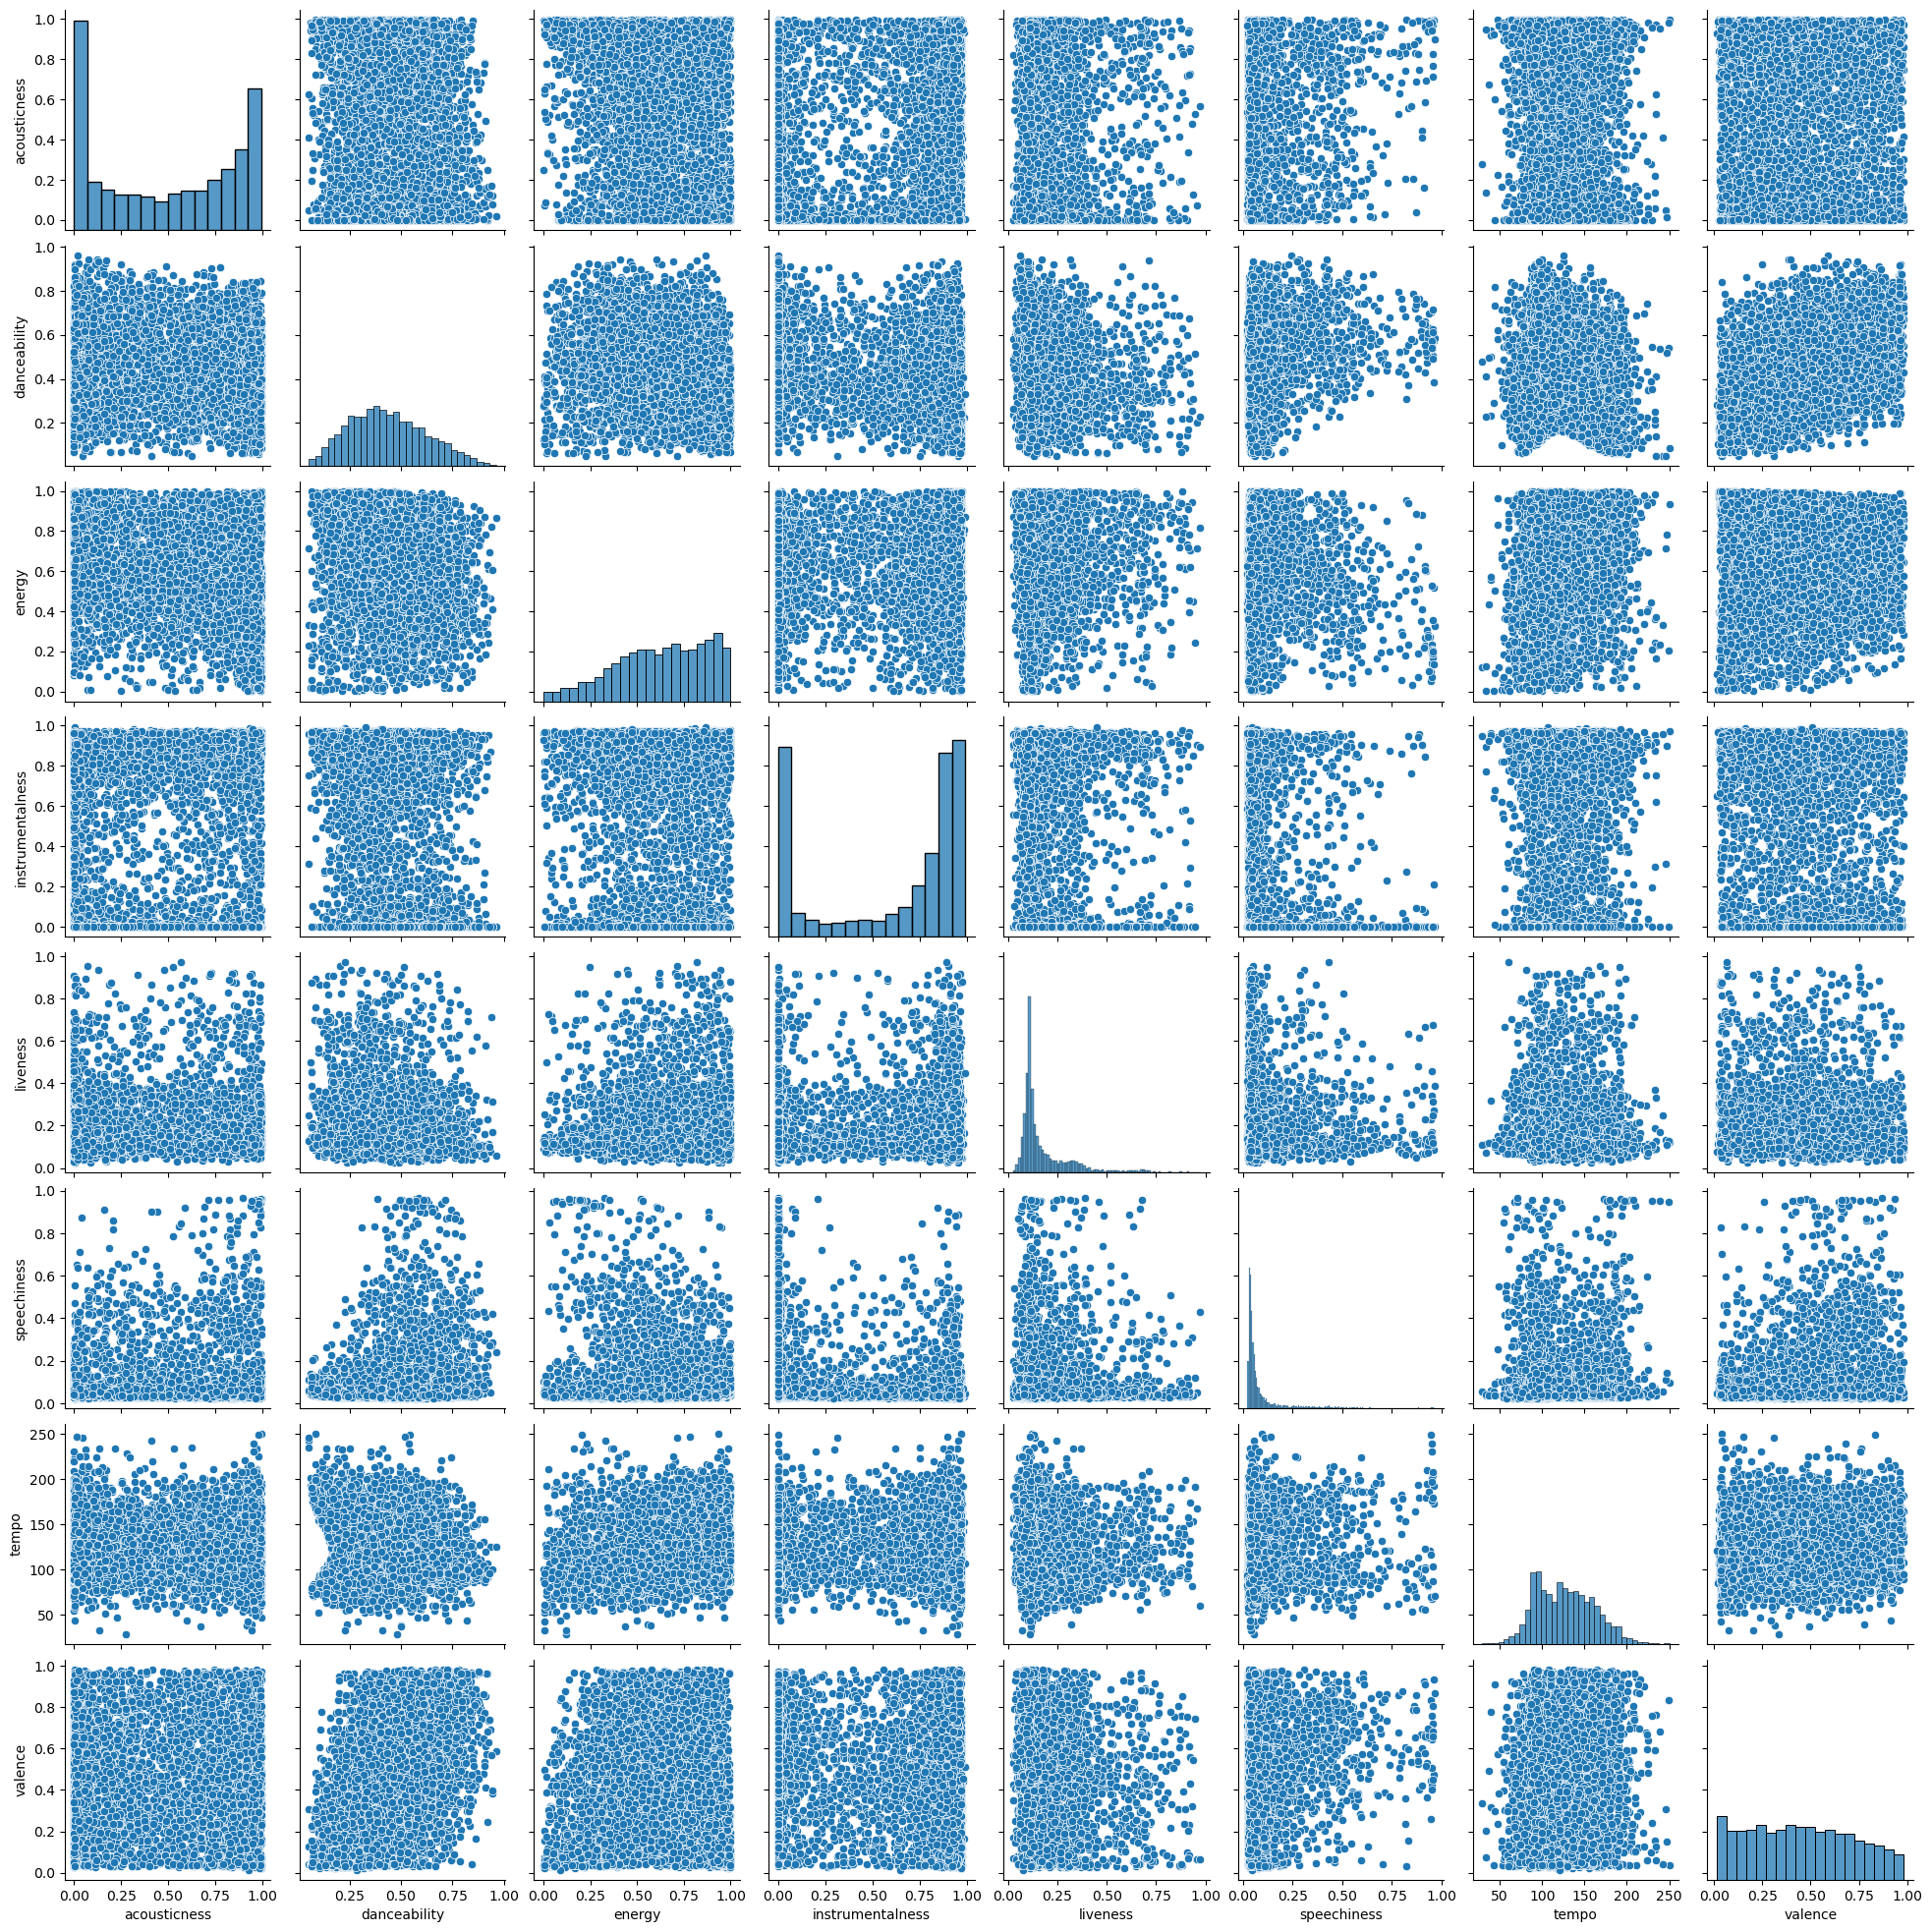

In [261]:
sns.pairplot(x)

In [211]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
scaled_data = scaller.fit_transform(x)

In [231]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

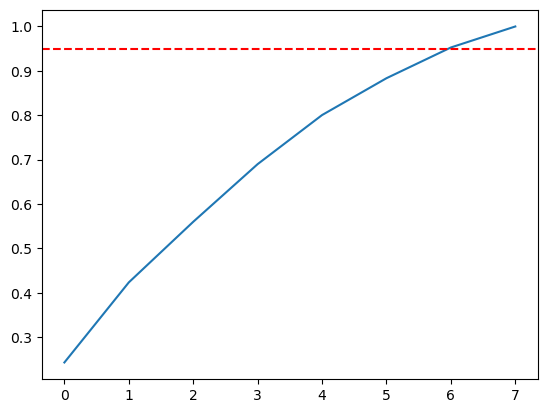

In [241]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(np.cumsum(variance_ratio))
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance') 
plt.show()

In [243]:
np.cumsum(variance_ratio)

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

In [245]:
## i am gonna take number of component = 6 
pca = PCA(n_components = 6, random_state = 42)

In [253]:
pca_data = pca.fit_transform(scaled_data)

In [281]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(pca_data, y, test_size = 0.2, random_state = 42)

In [291]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
from math import sqrt
from sklearn.metrics import (
    accuracy_score,            # Accuracy of the model
    precision_score,           # Precision of the model
    recall_score,              # Recall (Sensitivity) of the model
    f1_score,                  # F1 Score (Harmonic mean of precision and recall)
    confusion_matrix,          # Confusion Matrix
    roc_auc_score,             # Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
    classification_report,      # Summary of precision, recall, f1-score for each class
    roc_curve,                 # Calculate the ROC curve
    average_precision_score     # Average Precision Score
)


In [303]:
models = { 'Decision Tree' : DecisionTreeClassifier(),
         'Random Forest' : RandomForestClassifier(),
         'Catboost' : CatBoostClassifier(verbose=0),
         'XGB':XGBClassifier(),
         'LogisticRegression':LogisticRegression(),
         'Grediant Boost':GradientBoostingClassifier(),
         'AdaBosst': AdaBoostClassifier(),
         'KNN' : KNeighborsClassifier()    
}

for key, model in models.items():
    print(f"{key} Model training is going on....\n")
    model.fit(x_train, y_train)
    print(f"{key} Model training is completed")
    print('-'*30)
    
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # model performanance on training data 
    
    accuracy = accuracy_score(y_train, y_pred_train)
    c_matrix = confusion_matrix(y_train, y_pred_train)
    roc_curve = roc_auc_score(y_train, y_pred_train)
    report = classification_report(y_train, y_pred_train)
    
    ## Printing the training data 
    print(f'Performanance of {key} on traning data\n')
    print(f'Accurecy of {key} is :{accuracy}')
    print(f"c_matrix of {key} is :\n {c_matrix}")
    print(f"roc_curve of {key} is  : {roc_curve}")
    print(report)
    print('\n')
    print("-"*30)
    
    ## model performanance on test data 
    
    accuracy_test = accuracy_score(y_test, y_pred_test)
    c_matrix_test = confusion_matrix(y_test, y_pred_test)
    roc_curve_test = roc_auc_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test)
    
    ## Printing the test dat performanance 
    print(f'Performanance of {key} on test data\n')
    print(f'Accurecy of {key} is :{accuracy_test}')
    print(f"c_matrix of {key} is  :\n {c_matrix_test}")
    print(f"roc_curve of {key} is  : {roc_curve_test}")
    print(report_test)
    print('\n')
    print("="*30)
    print('\n')

Decision Tree Model training is going on....

Decision Tree Model training is completed
------------------------------
Performanance of Decision Tree on traning data

Accurecy of Decision Tree is :1.0
c_matrix of Decision Tree is :
 [[ 732    0]
 [   0 3109]]
roc_curve of Decision Tree is  : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       732
           1       1.00      1.00      1.00      3109

    accuracy                           1.00      3841
   macro avg       1.00      1.00      1.00      3841
weighted avg       1.00      1.00      1.00      3841



------------------------------
Performanance of Decision Tree on test data

Accurecy of Decision Tree is :0.8491155046826223
c_matrix of Decision Tree is  :
 [[113  65]
 [ 80 703]]
roc_curve of Decision Tree is  : 0.7663301620101309
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       178
           1       0.92      0.9